In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_data = pd.read_csv(r"C:\Users\obsession\Desktop\Projeto DAA\Dataset\training_data.csv", encoding='latin-1')
test_data = pd.read_csv(r"C:\Users\obsession\Desktop\Projeto DAA\Dataset\test_data.csv", encoding='latin-1')

In [3]:
training_data['AVERAGE_CLOUDINESS'].unique()

array([nan, 'céu claro', 'nuvens dispersas', 'céu pouco nublado',
       'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado',
       'nuvens quebradas', 'nublado'], dtype=object)

In [4]:
training_data.keys()

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [6]:
training_data.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [7]:
training_data.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [8]:
'''
Total de rows = 6812

Missing values:
AVERAGE_CLOUDINESS
AVERAGE_RAIN

'''

'\nTotal de rows = 6812\n\nMissing values:\nAVERAGE_CLOUDINESS\nAVERAGE_RAIN\n\n'

In [9]:
'''
Preparar o dataset
'''
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

#Precisamos de escalar certos valores para 0-1
from sklearn.preprocessing import MinMaxScaler

training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))



#Ordenar a dataframe por as datas
#training_data = training_data.sort_values(by='record_date')


training_data.head()


,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,2019-08-29 07:00:00,Medium,0.433071,0.038786,0.381098,LIGHT,0.428571,0.708333,1.000000,0.214286,NaN,NaN
1,2018-08-10 14:00:00,High,0.440945,0.162901,0.625000,LIGHT,0.600000,0.750000,0.453488,0.357143,céu claro,NaN
2,2019-09-01 16:00:00,High,0.318898,0.129511,0.591463,LIGHT,0.742857,0.604167,0.546512,0.285714,NaN,NaN
3,2019-02-26 11:00:00,High,0.271654,0.205734,0.727134,LIGHT,0.514286,0.833333,0.395349,0.285714,céu claro,NaN
4,2019-06-06 12:00:00,Medium,0.437008,0.169983,0.466463,LIGHT,0.428571,0.479167,0.790698,0.714286,NaN,NaN


In [10]:
dfdate= pd.to_datetime(training_data['record_date'])
#training_data['record_date'] =  pd.to_datetime(training_data['record_date'], infer_datetime_format=True)
# define the bins
bins = [0, 7, 11, 14, 17, 19, 21, 24]

# add custom labels if desired
labels = ['00:00-06:59', '07:00-10:59', '11:00-13:59', '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)

def ismeia(cols):
    TimeBin=cols
    if TimeBin==labels[0]:
        return 1
    else:
        return 0
    
def issete(cols):
    TimeBin=cols
    if TimeBin==labels[1]:
        return 1
    else:
        return 0

def isonze(cols):
    TimeBin=cols
    if TimeBin==labels[2]:
        return 1
    else:
        return 0
    
def isquatorze(cols):
    TimeBin=cols
    if TimeBin==labels[3]:
        return 1
    else:
        return 0
    
def isdessasete(cols):
    TimeBin=cols
    if TimeBin==labels[4]:
        return 1
    else:
        return 0
    

def isdezanove(cols):
    TimeBin=cols
    if TimeBin==labels[5]:
        return 1
    else:
        return 0
    
def isvinteum(cols):
    TimeBin=cols
    if TimeBin==labels[6]:
        return 1
    else:
        return 0
    


training_data[labels[0]] = training_data['Time Bin'].apply(ismeia)
training_data[labels[1]] = training_data['Time Bin'].apply(issete)
training_data[labels[2]] = training_data['Time Bin'].apply(isonze)
training_data[labels[3]] = training_data['Time Bin'].apply(isquatorze)
training_data[labels[4]] = training_data['Time Bin'].apply(isdessasete)
training_data[labels[5]] = training_data['Time Bin'].apply(isdezanove)
training_data[labels[6]] = training_data['Time Bin'].apply(isvinteum)

training_data=training_data.drop('Time Bin',axis=1)

test_data[labels[0]] = test_data['Time Bin'].apply(ismeia)
test_data[labels[1]] = test_data['Time Bin'].apply(issete)
test_data[labels[2]] = test_data['Time Bin'].apply(isonze)
test_data[labels[3]] = test_data['Time Bin'].apply(isquatorze)
test_data[labels[4]] = test_data['Time Bin'].apply(isdessasete)
test_data[labels[5]] = test_data['Time Bin'].apply(isdezanove)
test_data[labels[6]] = test_data['Time Bin'].apply(isvinteum)


test_data=test_data.drop('Time Bin',axis=1)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59
0,2019-08-29 07:00:00,Medium,0.433071,0.038786,0.381098,LIGHT,0.428571,0.708333,1.000000,0.214286,NaN,NaN,0,1,0,0,0,0,0
1,2018-08-10 14:00:00,High,0.440945,0.162901,0.625000,LIGHT,0.600000,0.750000,0.453488,0.357143,céu claro,NaN,0,0,0,1,0,0,0
2,2019-09-01 16:00:00,High,0.318898,0.129511,0.591463,LIGHT,0.742857,0.604167,0.546512,0.285714,NaN,NaN,0,0,0,1,0,0,0
3,2019-02-26 11:00:00,High,0.271654,0.205734,0.727134,LIGHT,0.514286,0.833333,0.395349,0.285714,céu claro,NaN,0,0,1,0,0,0,0
4,2019-06-06 12:00:00,Medium,0.437008,0.169983,0.466463,LIGHT,0.428571,0.479167,0.790698,0.714286,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.421260,0.012479,0.617378,LIGHT,0.257143,0.937500,0.662791,0.285714,céu claro,NaN,0,1,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.330709,0.175042,0.464939,LIGHT,0.485714,0.729167,0.569767,0.428571,NaN,NaN,0,0,0,0,1,0,0
6809,2018-10-02 04:00:00,None,0.358268,0.000000,0.650915,DARK,0.428571,0.729167,0.290698,0.285714,céu claro,NaN,1,0,0,0,0,0,0
6810,2019-01-30 01:00:00,None,0.437008,0.000000,0.596037,DARK,0.228571,0.687500,0.779070,0.071429,algumas nuvens,NaN,1,0,0,0,0,0,0


In [11]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(training_data['record_date'])

asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)


training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.433071,0.038786,0.381098,LIGHT,0.428571,0.708333,1.000000,0.214286,NaN,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.440945,0.162901,0.625000,LIGHT,0.600000,0.750000,0.453488,0.357143,céu claro,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.318898,0.129511,0.591463,LIGHT,0.742857,0.604167,0.546512,0.285714,NaN,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.271654,0.205734,0.727134,LIGHT,0.514286,0.833333,0.395349,0.285714,céu claro,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.437008,0.169983,0.466463,LIGHT,0.428571,0.479167,0.790698,0.714286,NaN,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.421260,0.012479,0.617378,LIGHT,0.257143,0.937500,0.662791,0.285714,céu claro,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.330709,0.175042,0.464939,LIGHT,0.485714,0.729167,0.569767,0.428571,NaN,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.358268,0.000000,0.650915,DARK,0.428571,0.729167,0.290698,0.285714,céu claro,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.437008,0.000000,0.596037,DARK,0.228571,0.687500,0.779070,0.071429,algumas nuvens,NaN,1,0,0,0,0,0,0,1


In [12]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(test_data['record_date'])

asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)


test_data

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,...,AVERAGE_PRECIPITATION,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,...,0.0,NaN,0,0,0,0,0,0,1,1
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,...,0.0,NaN,0,0,0,0,0,1,0,1
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,...,0.0,NaN,1,0,0,0,0,0,0,1
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,...,0.0,NaN,0,0,0,0,1,0,0,0
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,...,0.0,chuva fraca,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,...,0.0,chuva fraca,1,0,0,0,0,0,0,0
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,...,0.0,NaN,1,0,0,0,0,0,0,1
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,...,0.0,NaN,1,0,0,0,0,0,0,1
1498,Porto,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,...,0.0,chuva moderada,0,1,0,0,0,0,0,1


In [13]:
#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado


training_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


training_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)


#training_data.replace(to_replace ='      nan', 
#                 value = 0.3, 
#                regex=True,
#                  inplace = True)



In [14]:
training_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")

dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]

mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", 
                 value = mediaRAS, 
                  inplace = True)


In [15]:
#training_data['AVERAGE_CLOUDINESS'].unique()

In [16]:
#training_data['AVERAGE_CLOUDINESS'].interpolate(method='linear', limit_direction='both')

In [17]:
training_data.isna().any()

record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS         False
AVERAGE_RAIN                True
00:00-06:59                False
07:00-10:59                False
11:00-13:59                False
14:00-16:59                False
17:00-18:59                False
19:00-20:59                False
21:00-23:59                False
IsDayOfWeek                False
dtype: bool

In [18]:
#training_data['AVERAGE_CLOUDINESS'].fillna(method='ffill')

In [19]:
training_data['AVERAGE_CLOUDINESS'].unique()

array([0.79588298, 0.999999  , 0.666666  , 0.333333  ])

In [20]:
#Agora temos de tratar da Luminosity

training_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)


training_data


,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.433071,0.038786,0.381098,0.999999,0.428571,0.708333,1.000000,0.214286,0.795883,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.440945,0.162901,0.625000,0.999999,0.600000,0.750000,0.453488,0.357143,0.999999,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.318898,0.129511,0.591463,0.999999,0.742857,0.604167,0.546512,0.285714,0.795883,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.271654,0.205734,0.727134,0.999999,0.514286,0.833333,0.395349,0.285714,0.999999,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.437008,0.169983,0.466463,0.999999,0.428571,0.479167,0.790698,0.714286,0.795883,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.421260,0.012479,0.617378,0.999999,0.257143,0.937500,0.662791,0.285714,0.999999,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.330709,0.175042,0.464939,0.999999,0.485714,0.729167,0.569767,0.428571,0.795883,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.358268,0.000000,0.650915,0.333333,0.428571,0.729167,0.290698,0.285714,0.999999,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.437008,0.000000,0.596037,0.333333,0.228571,0.687500,0.779070,0.071429,0.666666,NaN,1,0,0,0,0,0,0,1


In [21]:
#Agora vamos tratar de AVERAGE_CLOUDINESS
training_data = training_data.drop(['record_date'], axis=1)
#training_data = training_data.drop(['AVERAGE_CLOUDINESS'], axis=1)
training_data = training_data.drop(['AVERAGE_RAIN'], axis=1)

In [22]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   object 
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   float64
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   float64
 10  00:00-06:59              6812 non-null   int64  
 11  07:00-10:59              6812 non-null   int64  
 12  11:00-13:59              6812 non-null   int64  
 13  14:00-16:59              6812 non-null   int64  
 14  17:00-18:59             

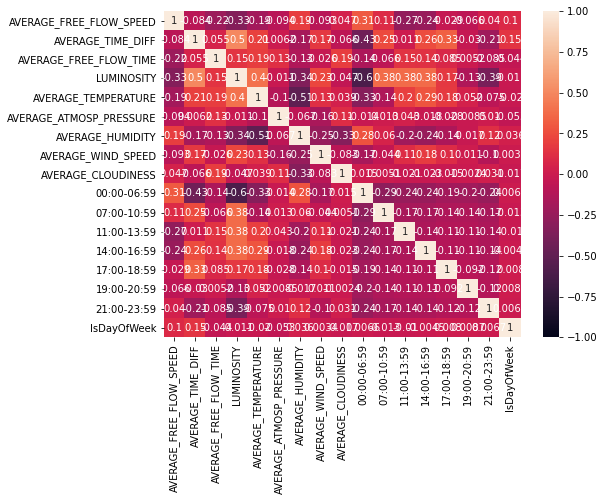

In [23]:
corr_matrix = training_data.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=False, annot=True);

In [24]:
from sklearn.model_selection import train_test_split

X= training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data['AVERAGE_SPEED_DIFF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21027)

In [25]:
from sklearn.svm import SVC
model = SVC(random_state=2027)
model.fit(X_train, y_train)


SVC(random_state=2027)

0.64 accuracy


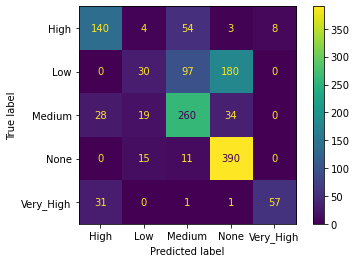

In [26]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))
plot_confusion_matrix(model, X_test, y_test)

In [27]:
'''
Grid
'''

C_range = np.logspace(0, 4, 100)
gamma_range = np.logspace(-4, 0, 100)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=['kbf'])

In [28]:
'''
Grid
'''
#param_grid = {'C': [0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,99100,99200,99300,99400,99000,98000,97000,96000,85000,80000,70000,60000,50000,40000,30000,20000,10000,100000,110000,120000,13000,140000,150000,160000,170000,180000,190000,200000,99.5,100.5,101,101.5,102,103,104,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.3,0.29,0.28,0.27,0.31,0.305,0.32,0.35,0.35,0.33,0.31,0.29,0.28,0.6,0.7,0.8,0.35,0.4,0.45,0.17,0.12,0.15,0.14,0.145,0.138,0.13,0.60, 0.25, 0.5,0.6, 0.75, 1, 10, 100, 1000], 'gamma': [1,0.1,0.000001,0.000002,0.000003,0.0000035,0.0000033, 0.00000001, 0.0000000003, 0.000004 ,0.00001,0.00015,0.00018,0.00022,0.000222,0.00021,0.00023,0.000225,0.00023,0.0003,0.00035,0.00025,0.01,0.001,0.0005,0.0004,0.00037,0.00041,0.00039,0.00043,0.0003,0.0005,0.0001,0.00015, 0.00025, 0.0003, 0.0002, 0.00007, 0.00005], 'kernel': ['rbf']}

#param_grid = {'C':[100000.0,1 ], 'gamma':[0.0326222200971167], 'kernel':['rbf']}

'\nGrid\n'

In [29]:
'''
Train model
'''
from sklearn.model_selection import GridSearchCV
#n_jobs é o numero de threads do cpu
grid = GridSearchCV(SVC(random_state=2027), param_grid, refit=True, n_jobs=24, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


C:\Users\obsession\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


ValueError: 'kbf' is not in list

In [ ]:
'''
Model Evaluation
'''
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))




grid.best_params_
#{'C': 100000.0, 'gamma': 0.0326222200971167}
#{'C': 1873.817422860383, 'gamma': 0.12328467394420659}
#{'C': 1000.0, 'gamma': 0.15459277364194776}

In [ ]:
test_data = test_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['AVERAGE_CLOUDINESS'], axis=1)
test_data = test_data.drop(['AVERAGE_RAIN'], axis=1)
test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

In [ ]:
#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado

test_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

test_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")


test_data.replace(to_replace ="MISSING VALUE", 
                 value = 0.555555, 
                  inplace = True)

test_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


test_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)


In [ ]:
#Agora temos de tratar da Luminosity

test_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)



test_data.head()

In [ ]:
#Normalzie data

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data.head()

In [ ]:
grid_predictions = grid.predict(test_data)
#print(classification_report(test_data,grid_predictions))

In [ ]:
grid_predictions

In [ ]:
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
# print dataframe columns

df_t = df_t.set_axis(["Speed_Diff"], axis=1)
df_t.index = df_t.index+1
#df_t = df_t.rename(columns={"RowId":"Speed_Diff"})

df_t
df_t.to_csv("submission2_poly.csv", index_label='RowId')